In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
df = pd.read_csv('datasets/Telco-Customer-Churn.csv')

In [104]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4707,0961-ZWLVI,Male,0,No,Yes,49,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.20,5290.45,No
3514,6993-YCOBK,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.60,6586.85,No
1708,8640-SDGKB,Male,0,No,No,4,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,74.40,299.7,Yes
1316,9788-YTFGE,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,147.5,No
1944,0420-BWTPW,Male,0,No,Yes,8,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,25.50,215.2,Yes


In [105]:
df.drop('customerID', axis='columns',inplace=True)

In [106]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [107]:
df.loc[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
# df.loc[df.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [108]:
df = df[df.TotalCharges != ' ']

In [109]:
df.shape

(7032, 20)

In [110]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [111]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [112]:
def columns_values(df):
    for columns in df:
        if df[columns].dtype == 'object':
            print(f'{columns} : {df[columns].unique()}')

In [113]:
columns_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [114]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

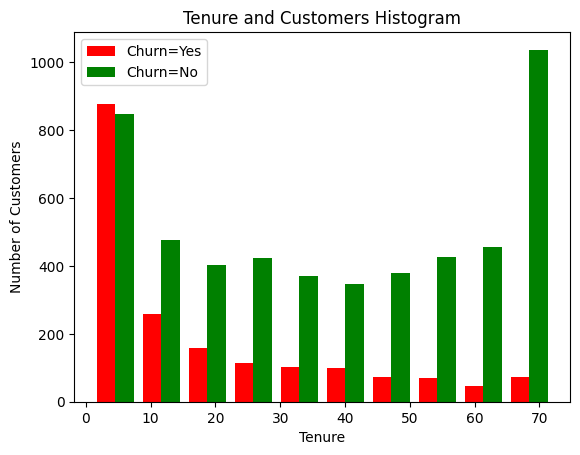

In [115]:
tenure_churn_no = df.loc[df['Churn'] == 'No', 'tenure']
tenure_churn_yes = df.loc[df['Churn'] == 'Yes', 'tenure']

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title("Tenure and Customers Histogram")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [116]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [117]:
columns_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [118]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                  'MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV','StreamingMovies', 'Churn']

In [119]:
for col in binary_columns:
    df[col].replace({'Yes': 1, 'No': 0},inplace=True)

In [120]:
columns_values(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [121]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2464,Female,0,0,0,1,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,77.15,77.15,1
6308,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Electronic check,70.35,139.25,0
5380,Male,0,0,0,2,1,0,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,80.25,144.55,1
6061,Female,0,0,1,26,1,1,DSL,0,0,0,0,0,0,Month-to-month,1,Mailed check,49.50,1265.65,0
2158,Female,0,1,1,57,1,1,DSL,1,0,1,1,1,1,Two year,1,Electronic check,84.50,4845.40,0
1364,Female,0,1,1,51,1,0,DSL,1,1,1,1,1,1,Two year,0,Credit card (automatic),85.50,4421.95,0
2002,Male,0,0,0,54,0,0,DSL,1,0,0,1,1,0,Two year,0,Credit card (automatic),45.20,2460.55,0
830,Female,0,1,0,50,1,1,Fiber optic,1,1,0,1,1,1,One year,0,Electronic check,108.55,5610.70,1
853,Female,0,0,0,5,1,0,DSL,1,0,0,1,1,0,Month-to-month,1,Electronic check,64.35,352.65,0
6954,Male,0,0,0,15,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.80,309.40,0


In [122]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [123]:
columns_values(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [124]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [125]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract', 'PaymentMethod'])

In [129]:
pd.set_option('display.max_columns', None)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False


In [130]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [132]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3862,0,0,1,1,0.971831,1,1,0,0,0,0,0,0,0,0.071144,0.203468,0,False,False,True,False,False,True,False,False,False,True
682,0,0,0,0,0.028169,1,0,1,0,0,1,1,0,1,0.459204,0.020407,0,True,False,False,True,False,False,False,True,False,False
4854,0,0,1,1,0.239437,0,0,0,1,1,0,1,0,0,0.280100,0.091576,0,True,False,False,False,True,False,False,True,False,False
758,1,0,0,1,0.197183,1,0,0,1,0,0,0,1,1,0.673134,0.144328,1,False,True,False,True,False,False,True,False,False,False
5293,0,0,0,0,0.450704,1,1,1,0,0,0,0,0,0,0.615423,0.298234,0,False,True,False,False,True,False,True,False,False,False
3379,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,0,0.010448,0.002954,0,False,False,True,True,False,False,False,False,False,True
6130,1,0,0,0,0.802817,1,0,1,1,1,1,0,0,1,0.464179,0.435801,0,True,False,False,False,False,True,False,True,False,False
5301,0,0,1,1,0.394366,1,1,0,0,1,0,0,1,1,0.705970,0.309203,1,False,True,False,True,False,False,False,False,True,False
3149,1,0,0,0,0.098592,1,0,0,0,1,1,0,1,0,0.456219,0.055995,0,True,False,False,True,False,False,False,False,False,True
5212,0,0,1,1,1.000000,0,0,1,1,1,0,0,0,0,0.201493,0.316663,0,True,False,False,False,False,True,False,True,False,False


In [133]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train = X_train.astype('float32')

In [152]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1.0,1.0,0.0,0.0,0.126761,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.660199,0.097709,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
101,1.0,0.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011940,0.000075,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2621,0.0,0.0,1.0,0.0,0.985915,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.605473,0.639978,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
392,1.0,1.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.259204,0.008135,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1327,0.0,0.0,1.0,0.0,0.816901,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.808458,0.685703,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,1.0,0.0,1.0,1.0,0.985915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.712935,0.729737,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1730,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.413930,0.004737,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4086,1.0,0.0,1.0,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.606468,0.621175,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2259,1.0,0.0,0.0,0.0,0.098592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025871,0.016484,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [154]:
X_test = X_test.astype('float32')

In [151]:
import tensorflow as tf 
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5062 - accuracy: 0.7618
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7931
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 0s 925us/step - loss: 0.4151 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 0s 962us/step - loss: 0.4143 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 969us/step - loss: 0.4133 - accuracy: 0.8030
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8030
Epoch 9/100
176/176 [==============================] - 0s 945us/step - loss: 0.4117 - accuracy: 0.8043
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4112 

176/176 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.8187
Epoch 81/100
176/176 [==============================] - 0s 958us/step - loss: 0.3917 - accuracy: 0.8158
Epoch 82/100
176/176 [==============================] - 0s 959us/step - loss: 0.3917 - accuracy: 0.8169
Epoch 83/100
176/176 [==============================] - 0s 976us/step - loss: 0.3910 - accuracy: 0.8192
Epoch 84/100
176/176 [==============================] - 0s 904us/step - loss: 0.3909 - accuracy: 0.8206
Epoch 85/100
176/176 [==============================] - 0s 933us/step - loss: 0.3913 - accuracy: 0.8171
Epoch 86/100
176/176 [==============================] - 0s 994us/step - loss: 0.3908 - accuracy: 0.8185
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8178
Epoch 88/100
176/176 [==============================] - 0s 950us/step - loss: 0.3918 - accuracy: 0.8171
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.390

In [155]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7818


[0.44650787115097046, 0.7818052768707275]